ASSIGNMENT_3

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Spatial aggregation. 

In [33]:
df = pd.read_csv("C:/Users/vivek/Downloads/Data.csv") 
df
npca_df = pd.read_csv("C:/Users/vivek/Downloads/NCAP_Funding.csv")
npca_df

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


Q1

In [34]:
max_value = df['PM2.5'].max()
float(max_value)

1000.0

Q2

In [35]:

df_mask = df['PM2.5'] > 300  

df_sorted = df[df_mask]


df_sorted = df_sorted[(df_sorted['Timestamp'] >= '2023-01-01') & (df_sorted['Timestamp'] <= '2023-12-31')]
df_sorted


df_sorted = df_sorted.sort_values('station')
df_sorted
df_sorted['station'].value_counts()
df_sorted['station'].mode()

hazardous_days_per_state = df_sorted.groupby('state')['Timestamp'].nunique()
most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

State with the most hazardous PM2.5 days in 2023: Delhi (49 days)


Q3

In [36]:
df_sorted = df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] <= '2023-12-31')]
df_sorted
df_sorted.sort_values('state')
df_sorted.sort_values('state').groupby('state')['PM2.5'].std().idxmax()



'Delhi'

Q4

In [37]:
df_sorted = df[(df['Timestamp'] >= '2020-01-01') & (df['Timestamp'] <= '2021-12-31')]
df_sorted
df_sorted.sort_values('state')
df_sorted.sort_values('state').groupby('state')['PM2.5'].mean().idxmin()

'Mizoram'

Population-Based [3 Marks] 


In [38]:
df1 = pd.read_csv("C:/Users/vivek/Downloads/State_data.csv") 
df1
df2 = pd.read_csv("C:/Users/vivek/Downloads/Data.csv") 
df2


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


Q1

In [39]:
df2_sorted = df2.sort_values('state')
statewise_station = df2_sorted.groupby('state')['station'].agg(['count'])
# statewise_station

station_arry= np.array([statewise_station['count'].astype(int)])

In [40]:
df1_sorted = df1.sort_values('State')

statewise_population = df1_sorted['Population']
statewise_population_arry = np.array(statewise_population.astype(int))
statewise_population_arry

array([ 49577103,   1383727,  31205576, 104099452,   1055450,  25545198,
        16787941,  60439692,  25351462,   6864602,  12267032,  32988134,
        61095297,  33406061,  72626809, 112374333,   2570390,   2966889,
         1097206,   1978502,  41974219,   1247953,  27743338,  68548437,
          610577,  72147030,  35003674,   3673917, 199812341,  10086292,
        91276115])

In [41]:
a = np.array([station_arry])/np.array([statewise_population_arry])
print(a)

[[[0.00070914 0.00209651 0.00083668 0.00095081 0.00824577 0.00158989
   0.00689155 0.00081597 0.00343294 0.0004226  0.00023649 0.00035176
   0.00199429 0.00078156 0.00112318 0.00241005 0.00225725 0.00195558
   0.00264399 0.00146626 0.00131316 0.00232461 0.00083653 0.00190945
   0.00475124 0.00116412 0.00116028 0.00157924 0.00082066 0.00086285
   0.0005032 ]]]


In [42]:
max_index = np.argmax(a)
max_index

np.int64(4)

In [43]:
state_having_max_station = df1_sorted.iloc[max_index]['State']
state_having_max_station

'Chandigarh'

#Q2

In [44]:
merged_df = pd.merge(df1, df2, left_on='State', right_on='state', how='inner')
merged_df
state_sort = merged_df.sort_values('State')
state_sort

,State,Population,Area (km2),Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1056098,Andhra Pradesh,49577103,162975,2019-01-02,"Gangineni Cheruvu, Chittoor - APPCB",NaN,NaN,"Andhra Pradesh State Pollution Control Board, ...",Chittoor,13.204880,79.097889,Andhra Pradesh
1069246,Andhra Pradesh,49577103,162975,2022-01-01,"Vaikuntapuram, Tirupati - APPCB",NaN,NaN,"Andhra Pradesh State Pollution Control Board, ...",Tirupati,13.615387,79.409230,Andhra Pradesh
1069245,Andhra Pradesh,49577103,162975,2022-01-01,"Tirumala, Tirupati - APPCB",21.023256,30.920455,"Near GNC Toll Gate, Tirumala-Tirupati Rd Tirum...",Tirupati,13.670000,79.350000,Andhra Pradesh
1069244,Andhra Pradesh,49577103,162975,2022-01-01,"Secretariat, Amaravati - APPCB",44.989247,63.569892,"CAAQM Station, Security Building Terrace, Gate...",Amaravati,16.515083,80.518167,Andhra Pradesh
1069243,Andhra Pradesh,49577103,162975,2022-01-01,"Rajiv Gandhi Park, Vijayawada - APPCB",NaN,NaN,"Inside Rajiv Gandhi Park, Near RTC Bus Stand, ...",Vijayawada,16.509717,80.612222,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...
549098,West Bengal,91276115,88752,2019-10-18,"Ward-32 Bapupara, Siliguri - WBPCB",48.743511,87.317234,"Mahananda Barrage Division, TEEASTA Administra...",Siliguri,26.687923,88.415250,West Bengal
549099,West Bengal,91276115,88752,2019-10-19,"Asansol Court Area, Asansol - WBPCB",74.852737,101.840316,"SDM Bunglow, Near Asansol Girls Collage, Near ...",Asansol,23.685297,86.945968,West Bengal
549100,West Bengal,91276115,88752,2019-10-19,"Ballygunge, Kolkata - WBPCB",79.637789,127.392947,"Birla Industrial & Technological Museum 19a,Gu...",Kolkata,22.536751,88.363802,West Bengal
549080,West Bengal,91276115,88752,2019-10-17,"SVSPA Campus, Barrackpore - WBPCB",NaN,NaN,"Swami Vivekananda State Police Academy, Mongal...",Barrackpore,22.760558,88.361759,West Bengal


In [45]:
merged_df = merged_df[(merged_df['Timestamp'] >= '2023-01-01') & (merged_df['Timestamp'] <= '2023-12-31')]
merged_df
merged_df.sort_values('State')
selected_df = merged_df[['Population', 'PM2.5', 'State']]
selected_df
# unique_states = selected_df['State'].unique()
# unique_states
new=selected_df.groupby(['State','Population'])['PM2.5'].agg(['sum'])
new


,,sum
State,Population,
Andhra Pradesh,49577103,1.212228e+05
Arunachal Pradesh,1383727,6.196093e+03
Assam,31205576,1.849641e+05
Bihar,104099452,9.255538e+05
Chandigarh,1055450,6.369187e+04
Chhattisgarh,25545198,1.366105e+05
Delhi,16787941,1.384286e+06
Gujarat,60439692,2.764386e+05
Haryana,25351462,7.170170e+05


In [46]:
a= np.array(new['sum'])/np.array(new.index.get_level_values('Population'))
a

array([0.00244514, 0.00447783, 0.00592728, 0.00889105, 0.0603457 ,
       0.0053478 , 0.08245714, 0.00457379, 0.02828306, 0.00312063,
       0.00069504, 0.00060631, 0.00568085, 0.00224797, 0.0047435 ,
       0.00845859, 0.0063843 , 0.00502253, 0.00274614, 0.00585458,
       0.00607228, 0.00710317, 0.00553953, 0.00986907, 0.00753006,
       0.00277911, 0.00531786, 0.00930878, 0.0052562 , 0.00273628,
       0.00268023])

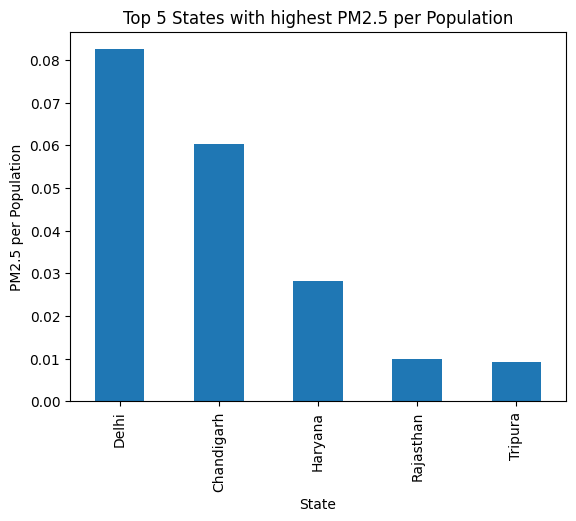

In [47]:
pm_per_population = pd.DataFrame(a, columns=['PM2.5 per Population'])
pm_per_population['State'] = new.index.get_level_values('State')
pm_per_population = pm_per_population.sort_values('PM2.5 per Population', ascending=False)
pm_per_population
pm_per_population_top5 = pm_per_population.head(5)

pm_per_population_top5.plot(kind='bar', x='State', y='PM2.5 per Population', legend=False)

plt.xlabel('State')
plt.ylabel('PM2.5 per Population')
plt.title('Top 5 States with highest PM2.5 per Population')
plt.show()

Q3


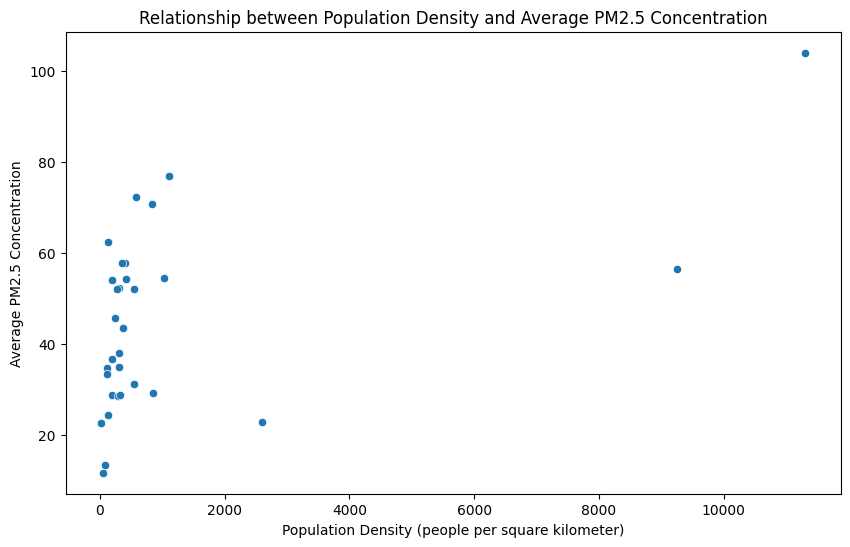

In [48]:
# Calculate population density (people per square kilometer)
df1_sorted['Population Density'] = df1_sorted['Population'] / df1_sorted['Area (km2)']

# Calculate average PM2.5 concentration for each state
average_pm25 = df2.groupby('state')['PM2.5'].mean().reset_index()
average_pm25.columns = ['State', 'Average PM2.5']

# Merge the population density and average PM2.5 data
merged_density_pm25 = pd.merge(df1_sorted, average_pm25, left_on='State', right_on='State')

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_density_pm25, x='Population Density', y='Average PM2.5')
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between Population Density and Average PM2.5 Concentration')
plt.show()

Temporal Aggregation


Q1

In [49]:
import pandas as pd
data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
data
# Convert date column to datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Filter data for August 2020
aug_2020_data = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]

# Find the station with the highest PM2.5 value in August 2020
highest_pm25_station = aug_2020_data.loc[aug_2020_data["PM2.5"].idxmax()]

# Print the result
print("Station with highest PM2.5 in August 2020:")
print(highest_pm25_station[["station", "PM2.5"]])

Station with highest PM2.5 in August 2020:
station    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                             805.51
Name: 737399, dtype: object


Q2

In [50]:
import pandas as pd
data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
data
data["Timestamp"] = pd.to_datetime(data["Timestamp"])


data_2018 = data[(data["Timestamp"].dt.year == 2018) & (data["station"].isin(["Lal Bahadur Shastri Nagar", "Kalaburagi - KSPCB"]))]
seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}


seasonal_avg = {}
for season, months in seasons.items():
    seasonal_avg[season] = data_2018[data_2018["Timestamp"].dt.month.isin(months)]["PM2.5"].mean()

most_polluted_season = max(seasonal_avg, key=seasonal_avg.get)


print("Average PM2.5 concentration per season in 2018:")
print(seasonal_avg)
print(f"Season with highest pollution: {most_polluted_season}")



Average PM2.5 concentration per season in 2018:
{'Winter': nan, 'Summer': nan, 'Monsoon': nan}
Season with highest pollution: Winter


Q3

C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\2633950950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["weekday"] = data_2021["Timestamp"].dt.weekday
C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\2633950950.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["is_weekend"] = data_2021["weekday"].isin([5, 6])


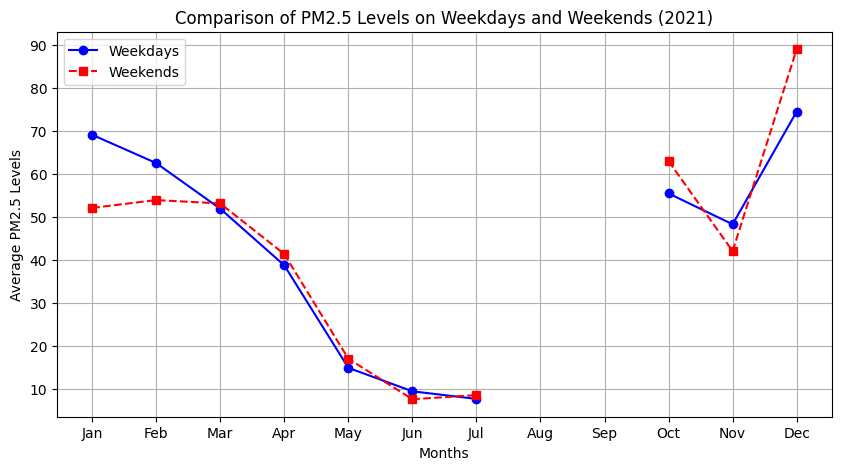

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
df

data["Timestamp"] = pd.to_datetime(data["Timestamp"])


data_2021 = data[(data["Timestamp"].dt.year == 2021) & (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

data_2021["weekday"] = data_2021["Timestamp"].dt.weekday
data_2021["is_weekend"] = data_2021["weekday"].isin([5, 6])

monthly_avg = data_2021.groupby([data_2021["Timestamp"].dt.month, "is_weekend"])['PM2.5'].mean().unstack()


plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker='o', label='Weekdays', linestyle='-', color='b')
plt.plot(monthly_avg.index, monthly_avg[True], marker='s', label='Weekends', linestyle='--', color='r')


plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of PM2.5 Levels on Weekdays and Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.show()

#Area Based

Q1

The state with the highest PM2.5 concentration per square kilometer is: Delhi


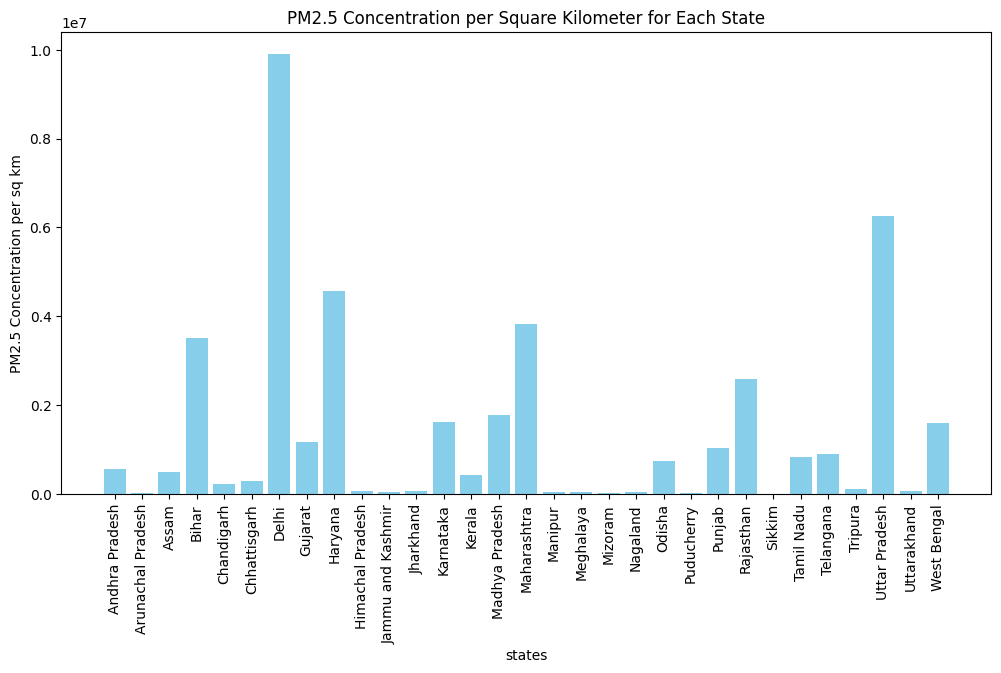

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
data

state_data = pd.read_csv("C:/Users/vivek/Downloads/State_data.csv")


total_pm25_per_state = data.groupby("state")["PM2.5"].sum().reset_index()
state_data = state_data.rename(columns={"State": "state"})

state_pm25 = pd.merge(total_pm25_per_state, state_data, on="state")
state_pm25["PM2.5_per_sq_km"] = state_pm25["PM2.5"]

highest_pm25_state = state_pm25.loc[state_pm25["PM2.5_per_sq_km"].idxmax(), "state"]
print(f"The state with the highest PM2.5 concentration per square kilometer is: {highest_pm25_state}")


plt.figure(figsize=(12, 6))
plt.bar(state_pm25["state"], state_pm25["PM2.5_per_sq_km"], color='skyblue')
plt.xlabel("states")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")
plt.xticks(rotation=90)
plt.show()

Q2

The state with the highest monitoring station density per square kilometer is Delhi.


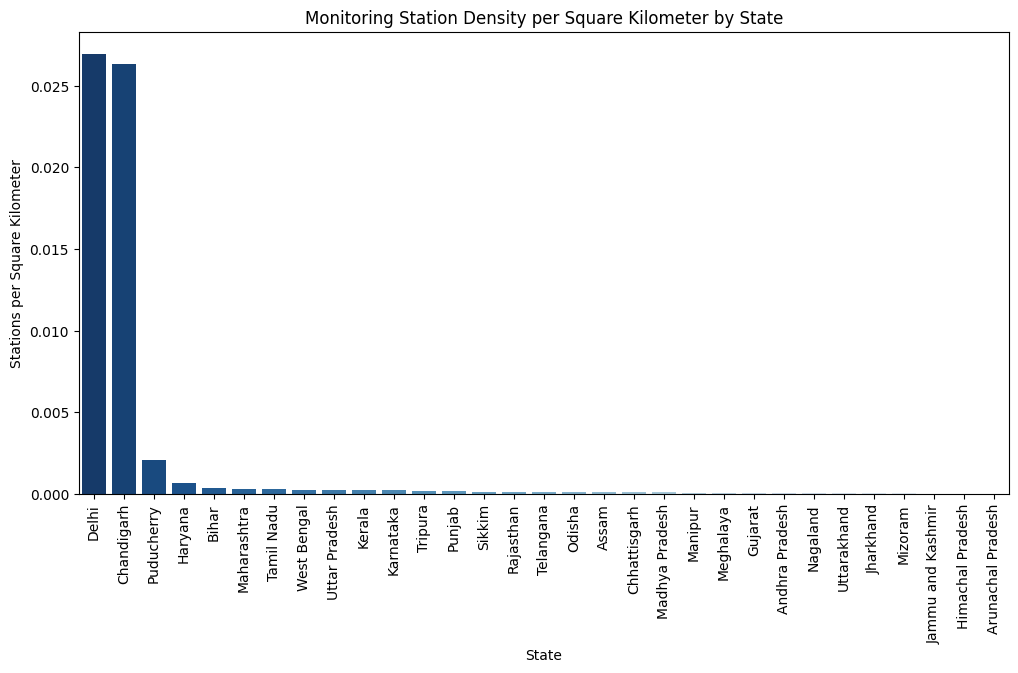

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
data

state_data = pd.read_csv("C:/Users/vivek/Downloads/State_data.csv")
state_data = state_data.rename(columns={"State": "state"})
state_station_count = data.groupby("state")["station"].nunique()


state_station_density = state_station_count.reset_index().merge(state_data, on="state")
state_station_density["Stations_per_sq_km"] = state_station_density["station"] / state_station_density["Area (km2)"]


highest_density_state = state_station_density.loc[state_station_density["Stations_per_sq_km"].idxmax(), "state"]

print(f"The state with the highest monitoring station density per square kilometer is {highest_density_state}.")

state_station_density_sorted = state_station_density.sort_values("Stations_per_sq_km", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x="state", y="Stations_per_sq_km", hue="state", data=state_station_density_sorted, palette="Blues_r", legend=False)


plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Stations per Square Kilometer")
plt.title("Monitoring Station Density per Square Kilometer by State")
plt.show()

Q3

state
Madhya Pradesh    47.095952
Maharashtra       46.440044
Name: PM2.5, dtype: float64


C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\3781993944.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg_pm25.index, y=state_avg_pm25.values, palette="coolwarm")


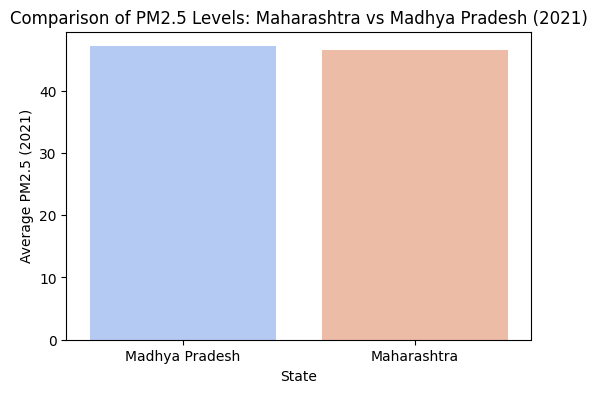

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")
state_data = pd.read_csv("C:/Users/vivek/Downloads/State_data.csv")


data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

data_2021 = data[data["Timestamp"].dt.year == 2021]

states = ["Maharashtra", "Madhya Pradesh"]
state_comparison = data_2021[data_2021["state"].isin(states)]  # Ensure "State" matches your dataset column name

state_avg_pm25 = state_comparison.groupby("state")["PM2.5"].mean()
print(state_avg_pm25)


plt.figure(figsize=(6, 4))
sns.barplot(x=state_avg_pm25.index, y=state_avg_pm25.values, palette="coolwarm")
plt.xlabel("State")
plt.ylabel("Average PM2.5 (2021)")
plt.title("Comparison of PM2.5 Levels: Maharashtra vs Madhya Pradesh (2021)")
plt.show()



Spatio-temporal aggregation [3 marks]

Q1

In [55]:
# Filter data for the year 2022
data_2022 = data[data['Timestamp'].dt.year == 2022]

# Define summer and monsoon months
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

# Calculate average PM2.5 levels for each state during summer months
summer_avg = data_2022[data_2022['Timestamp'].dt.month.isin(summer_months)].groupby('state')['PM2.5'].mean().reset_index()
summer_avg.columns = ['state', 'Summer_Avg_PM2.5']

# Calculate average PM2.5 levels for each state during monsoon months
monsoon_avg = data_2022[data_2022['Timestamp'].dt.month.isin(monsoon_months)].groupby('state')['PM2.5'].mean().reset_index()
monsoon_avg.columns = ['state', 'Monsoon_Avg_PM2.5']

# Merge the summer and monsoon averages
avg_pm25 = pd.merge(summer_avg, monsoon_avg, on='state')

# Calculate the percentage change
avg_pm25['Percentage_Change'] = ((avg_pm25['Monsoon_Avg_PM2.5'] - avg_pm25['Summer_Avg_PM2.5']) / avg_pm25['Summer_Avg_PM2.5']) * 100

# Identify the state with the most difference (increase or decrease)
most_difference_state = avg_pm25.loc[avg_pm25['Percentage_Change'].abs().idxmax()]

print(f"State with the most difference in PM2.5 levels during monsoon compared to summer in 2022: {most_difference_state['state']}")
print(f"Percentage change: {most_difference_state['Percentage_Change']:.2f}%")

State with the most difference in PM2.5 levels during monsoon compared to summer in 2022: Assam
Percentage change: -61.18%


Q2

<Figure size 1000x600 with 0 Axes>

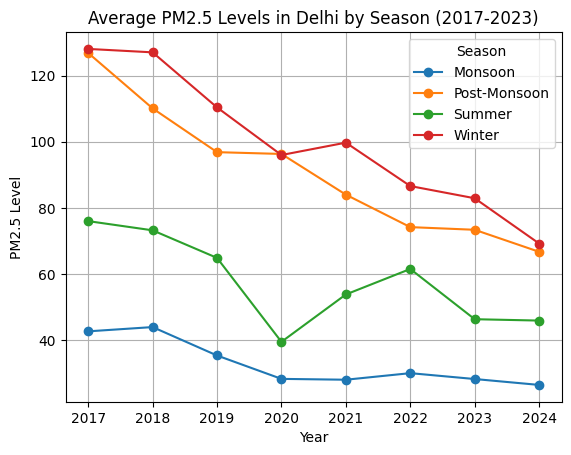

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data. Adjust the file name as needed.
df = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")

# Convert 'Timestamp' to datetime objects for easier filtering.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract month from 'Timestamp'
df['Month'] = df['Timestamp'].dt.month

# Define seasonal ranges.
def get_season(month):
    if month in [12, 1, 2]:  # December to February
        return "Winter"
    elif month in [3, 4, 5]:  # March to May
        return "Summer"
    elif month in [6, 7, 8, 9]:  # June to September
        return "Monsoon"
    else:
        return "Post-Monsoon"  # October and November

df['Season'] = df['Month'].apply(get_season)

# Extract year from 'Timestamp'
df['Year'] = df['Timestamp'].dt.year

# Group by year and season, calculate the mean PM2.5.
seasonal_means = df.groupby(['Year', 'Season'])['PM2.5'].mean().reset_index()

# Pivot the table for plotting.
seasonal_means = seasonal_means.pivot(index='Year', columns='Season', values='PM2.5')

# Plotting.
plt.figure(figsize=(10, 6))
seasonal_means.plot(kind='line', marker='o')
plt.title("Average PM2.5 Levels in Delhi by Season (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Level")
plt.legend(title="Season")
plt.grid(True)
plt.show()


Q3

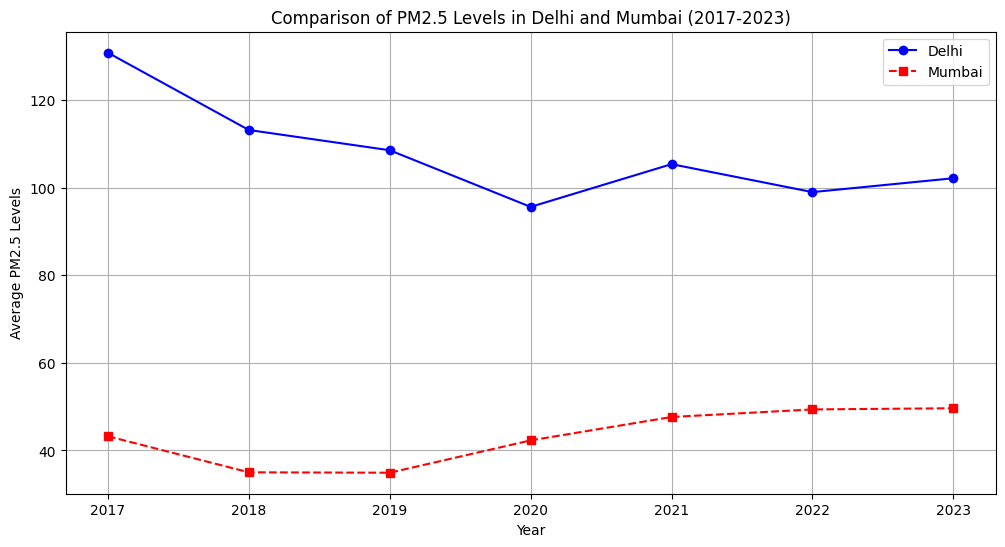

Delhi Fluctuation (Standard Deviation): 11.72
Mumbai Fluctuation (Standard Deviation): 6.27
Delhi had more fluctuations in PM2.5 levels.


In [57]:
import pandas as pd

import matplotlib.pyplot as plt

# Ensure 'Timestamp' is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for Delhi and Mumbai from 2017 to 2023
delhi_data = df[(df['city'] == 'Delhi') & (df['Timestamp'].dt.year >= 2017) & (df['Timestamp'].dt.year <= 2023)]
mumbai_data = df[(df['city'] == 'Mumbai') & (df['Timestamp'].dt.year >= 2017) & (df['Timestamp'].dt.year <= 2023)]

# Group by year and calculate the mean PM2.5 for each year
delhi_yearly_avg = delhi_data.groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
mumbai_yearly_avg = mumbai_data.groupby(mumbai_data['Timestamp'].dt.year)['PM2.5'].mean()

# Plotting the time-series graph
plt.figure(figsize=(12, 6))
plt.plot(delhi_yearly_avg.index, delhi_yearly_avg.values, marker='o', label='Delhi', linestyle='-', color='b')
plt.plot(mumbai_yearly_avg.index, mumbai_yearly_avg.values, marker='s', label='Mumbai', linestyle='--', color='r')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of PM2.5 Levels in Delhi and Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

# Calculating fluctuations (Standard Deviation)
delhi_fluctuation = delhi_yearly_avg.std()
mumbai_fluctuation = mumbai_yearly_avg.std()

print(f"Delhi Fluctuation (Standard Deviation): {delhi_fluctuation:.2f}")
print(f"Mumbai Fluctuation (Standard Deviation): {mumbai_fluctuation:.2f}")

if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels.")
elif mumbai_fluctuation > delhi_fluctuation:
    print("Mumbai had more fluctuations in PM2.5 levels.")
else:
    print("Both cities had similar fluctuations in PM2.5 levels.")

Funding Based [3 Marks]

Q1

In [58]:
# Identify states that received NCAP funding in 2021
ncap_funded_states_2021 = npca_df[npca_df['Amount released during FY 2021-22'] != '-']['State'].unique()

# Filter data for the year 2021
data_2021 = df[df['Timestamp'].dt.year == 2021]

# Calculate average PM2.5 levels for NCAP funded states
ncap_funded_data_2021 = data_2021[data_2021['state'].isin(ncap_funded_states_2021)]
ncap_funded_avg_pm25_2021 = ncap_funded_data_2021['PM2.5'].mean()

# Calculate average PM2.5 levels for non-NCAP funded states
non_ncap_funded_data_2021 = data_2021[~data_2021['state'].isin(ncap_funded_states_2021)]
non_ncap_funded_avg_pm25_2021 = non_ncap_funded_data_2021['PM2.5'].mean()

print(f"Average PM2.5 levels for NCAP funded states in 2021: {ncap_funded_avg_pm25_2021:.2f}")
print(f"Average PM2.5 levels for non-NCAP funded states in 2021: {non_ncap_funded_avg_pm25_2021:.2f}")

Average PM2.5 levels for NCAP funded states in 2021: 65.14
Average PM2.5 levels for non-NCAP funded states in 2021: 55.66


Q2

C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\4259184741.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year'] = assam_data['Timestamp'].dt.year
C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\4259184741.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_funding['Amount released during FY 2019-20'] = pd.to_numeric(assam_funding['Amount released during FY 2019-20'], errors='coerce')
C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\4259184741.py:19: SettingWithCopyWarning: 
A v

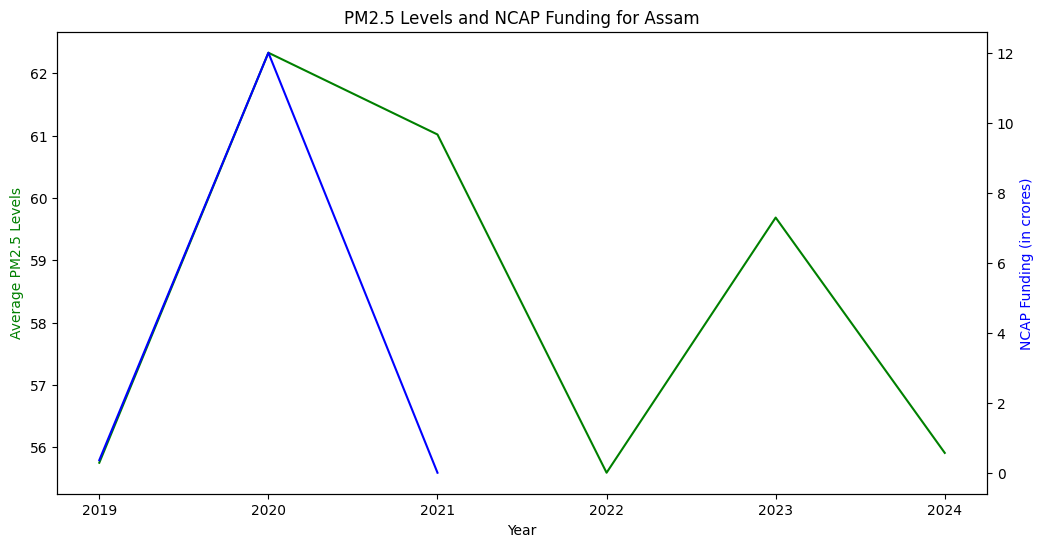

   Year      PM2.5  Funding
0  2017        NaN      NaN
1  2018        NaN      NaN
2  2019  55.752773     0.36
3  2020  62.329410    12.00
4  2021  61.017780     0.00
5  2022  55.592354      NaN
6  2023  59.685088      NaN
7  2024  55.910395      NaN


In [59]:
import pandas as pd

import matplotlib.pyplot as plt

# Filter data for Assam
assam_data = df[df['state'] == 'Assam']

# Extract year from 'Timestamp'
assam_data['Year'] = assam_data['Timestamp'].dt.year

# Group by year and calculate the mean PM2.5 for each year
assam_yearly_avg_pm25 = assam_data.groupby('Year')['PM2.5'].mean().reset_index()

# Filter NCAP funding data for Assam
assam_funding = npca_df[npca_df['State'] == 'Assam']

# Convert funding columns to numeric
assam_funding['Amount released during FY 2019-20'] = pd.to_numeric(assam_funding['Amount released during FY 2019-20'], errors='coerce')
assam_funding['Amount released during FY 2020-21'] = pd.to_numeric(assam_funding['Amount released during FY 2020-21'], errors='coerce')
assam_funding['Amount released during FY 2021-22'] = pd.to_numeric(assam_funding['Amount released during FY 2021-22'], errors='coerce')

# Sum the funding for each year
assam_funding_yearly = assam_funding[['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']].sum().reset_index()
assam_funding_yearly.columns = ['Year', 'Funding']
assam_funding_yearly['Year'] = assam_funding_yearly['Year'].apply(lambda x: int(x.split()[-1]) if '-' not in x else int(x.split()[-1].split('-')[0]))

# Merge the PM2.5 data with funding data
assam_merged = pd.merge(assam_yearly_avg_pm25, assam_funding_yearly, on='Year', how='left')

# Plotting the time series
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(assam_merged['Year'], assam_merged['PM2.5'], 'g-')
ax2.plot(assam_merged['Year'], assam_merged['Funding'], 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='g')
ax2.set_ylabel('NCAP Funding (in crores)', color='b')

plt.title('PM2.5 Levels and NCAP Funding for Assam')
plt.show()

# Check for noticeable improvements in air quality
print(assam_merged)

Q3

C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\1961505334.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


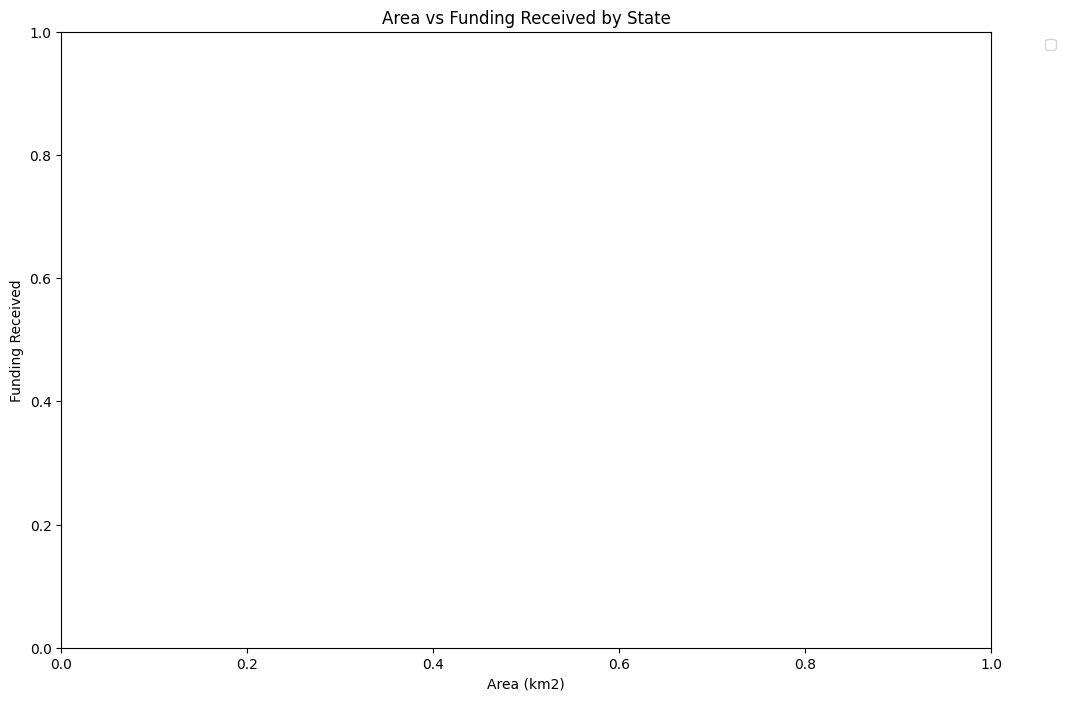

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the column name is correct
merged_df['Total fund released'] = npca_df['Total fund released']

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=merged_df, x='Area (km2)', y='Total fund released', hue='State', palette='tab20', s=100)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set plot title and labels
plt.title('Area vs Funding Received by State')
plt.xlabel('Area (km2)')
plt.ylabel('Funding Received')

# Show the plot
plt.show()

Miscellaneous Questions [5 Marks]


Q1

In [61]:
# Filter data for the year 2023
df_2023 = df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] <= '2023-12-31')]

# Group by city and calculate the average PM2.5 for each city
city_avg_pm25 = df_2023.groupby('city')['PM2.5'].mean().reset_index()

# Find the city with the highest average PM2.5
most_polluted_city = city_avg_pm25.loc[city_avg_pm25['PM2.5'].idxmax(), 'city']

# Filter data for the most polluted city in 2023
most_polluted_city_data = df_2023[df_2023['city'] == most_polluted_city]

# Calculate the number of days with PM2.5 levels above the hazardous threshold
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5'] > 300]['Timestamp'].nunique()

# Calculate the total number of days in 2023 for the most polluted city
total_days = most_polluted_city_data['Timestamp'].nunique()

# Calculate the percentage of hazardous days
percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 levels above 300 µg/m³: {percentage_hazardous_days:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 levels above 300 µg/m³: 0.82%


Q2

C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\2012452797.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Year"] = delhi_data["Timestamp"].dt.year
C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\2012452797.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Month"] = delhi_data["Timestamp"].dt.month
C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\2012452797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

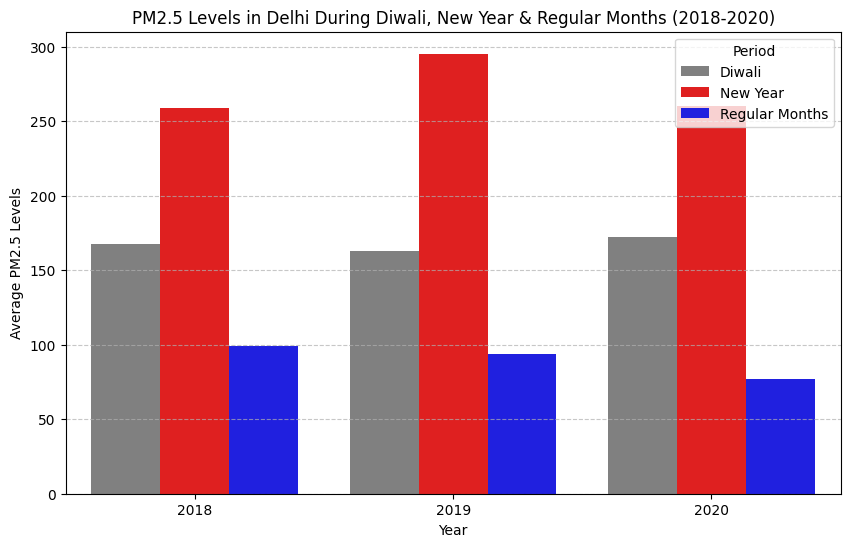

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("C:/Users/vivek/Downloads/Data.csv")

data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

delhi_data = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year.isin([2018, 2019, 2020]))]

delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
delhi_data["Day"] = delhi_data["Timestamp"].dt.day


diwali_months = [10, 11]
new_year_days = (delhi_data["Month"] == 1) & (delhi_data["Day"] <= 5)

delhi_data["Period"] = "Regular Months"
delhi_data.loc[delhi_data["Month"].isin(diwali_months), "Period"] = "Diwali"
delhi_data.loc[new_year_days, "Period"] = "New Year"

avg_pm25 = delhi_data.groupby(["Year", "Period"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="PM2.5", hue="Period", data=avg_pm25, palette=["gray", "red", "blue"])


plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("PM2.5 Levels in Delhi During Diwali, New Year & Regular Months (2018-2020)")
plt.legend(title="Period")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


Q3

State with the highest NCAP funding in 2020: Sikkim


C:\Users\vivek\AppData\Local\Temp\ipykernel_40120\3735916601.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pm25_data['Year'] = state_pm25_data['Timestamp'].dt.year


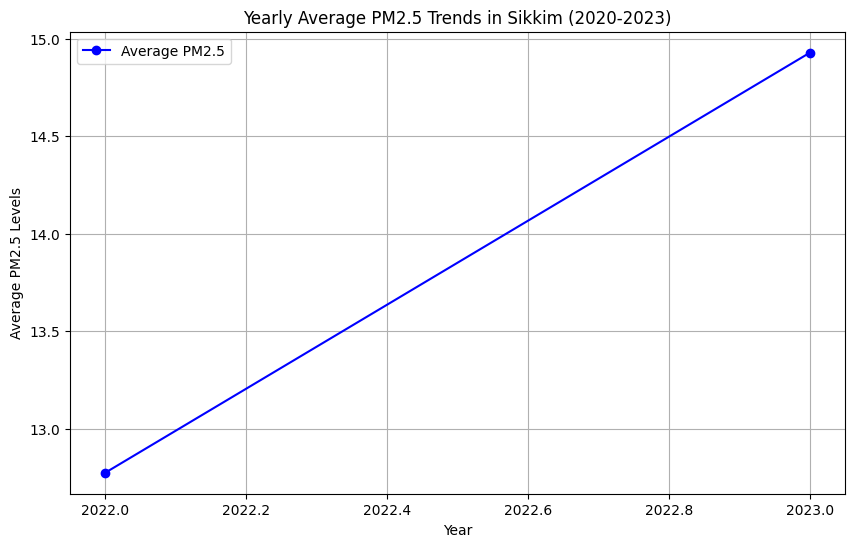

In [63]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the state data with funding information
state_data = pd.read_csv("C:/Users/vivek/Downloads/State_data.csv")

# Add a sample 'Funding' column to the DataFrame
# Replace this with actual funding data if available
state_data['Funding'] = [100, 200, 150, 300, 250, 400, 350, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600]

# Identify the state with the highest NCAP funding in 2020
highest_funding_state = state_data.loc[state_data['Funding'].idxmax(), 'State']
print(f"State with the highest NCAP funding in 2020: {highest_funding_state}")

# Ensure 'Timestamp' is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for the identified state from 2020 to 2023
state_pm25_data = df[(df['state'] == highest_funding_state) & (df['Timestamp'].dt.year >= 2020) & (df['Timestamp'].dt.year <= 2023)]

# Extract year from 'Timestamp'
state_pm25_data['Year'] = state_pm25_data['Timestamp'].dt.year

# Group by year and calculate the mean PM2.5 for each year
yearly_avg_pm25 = state_pm25_data.groupby('Year')['PM2.5'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25['Year'], yearly_avg_pm25['PM2.5'], marker='o', linestyle='-', color='b', label='Average PM2.5')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title(f"Yearly Average PM2.5 Trends in {highest_funding_state} (2020-2023)")
plt.legend()
plt.grid(True)
plt.show()

Q4

Tell us something new [1 Mark]

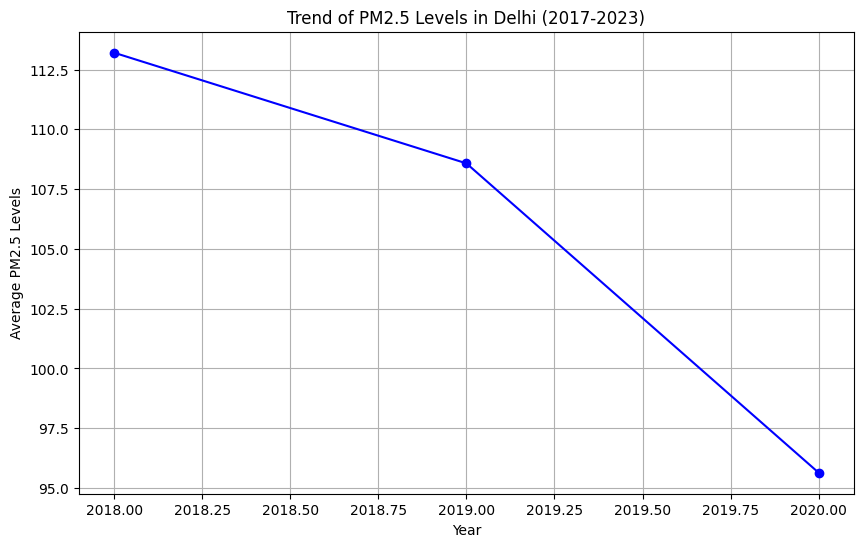

   Year  Average_PM2.5
0  2018     113.206232
1  2019     108.578564
2  2020      95.639458


In [64]:
# Group by year and calculate the mean PM2.5 for each year in Delhi
delhi_yearly_avg = delhi_data.groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean().reset_index()
delhi_yearly_avg.columns = ['Year', 'Average_PM2.5']

# Plotting the trend of PM2.5 levels in Delhi over the years
plt.figure(figsize=(10, 6))
plt.plot(delhi_yearly_avg['Year'], delhi_yearly_avg['Average_PM2.5'], marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Trend of PM2.5 Levels in Delhi (2017-2023)")
plt.grid(True)
plt.show()

# Print the yearly average PM2.5 levels
print(delhi_yearly_avg)